In [1]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

data1 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell-six_months.csv')
data2 = pd.read_csv('../data/properati/properati-AR-2017-07-01-properties-sell-six_months.csv')
data3 = pd.read_csv('../data/properati/properati-AR-2016-03-01-properties-sell-six_months.csv')
#data4 =
#data5 = 

In [2]:
data_frames = [data1, data2, data3]
data = pd.concat(data_frames)

In [ ]:
############################################

### filtrar por CABA y Gran Buenos Aires ###

############################################

In [168]:
data.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [57]:
data.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,month
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,February
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,February
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,February


In [184]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.997130e+05,164542.000000,164542.000000,1.995780e+05,1.995780e+05,1.995780e+05,161322.000000,1.964660e+05,131060.000000,1.688380e+05,20412.000000,120647.000000,2.458600e+04
mean,3.567993e+06,-34.656564,-59.257718,4.227614e+05,3.998520e+06,2.326915e+05,255.661137,1.031052e+04,2089.067534,6.221683e+03,16.556927,3.031911,5.173986e+03
std,3.734317e+05,2.071256,2.351986,1.689535e+06,6.346304e+06,3.681408e+05,2029.543670,4.512178e+06,2807.914666,2.527334e+04,123.435620,1.725182,1.294161e+05
min,3.427208e+06,-54.833014,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.077726,5.000000e-05,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.682001,-58.722767,1.000000e+05,1.495980e+06,8.600000e+04,49.000000,4.500000e+01,1113.486172,1.526611e+03,1.000000,2.000000,1.000000e+03
50%,3.433775e+06,-34.598708,-58.485090,1.785000e+05,2.452586e+06,1.400000e+05,85.000000,7.500000e+01,1735.849057,2.159091e+03,3.000000,3.000000,1.900000e+03
75%,3.832711e+06,-34.444479,-58.393658,3.890000e+05,4.487940e+06,2.600000e+05,215.000000,1.500000e+02,2405.405405,3.240741e+03,6.000000,4.000000,3.800000e+03
max,6.948895e+06,37.774929,3.379206,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,2.000000e+09,206333.333333,4.000000e+06,7071.000000,40.000000,1.000150e+07


In [185]:
data.isnull().sum()

id                                 0
created_on                         0
operation                          0
property_type                      0
place_name                        35
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    36343
lat-lon                        71514
lat                            71514
lon                            71514
price                          36478
currency                       39532
price_aprox_local_currency     36478
price_aprox_usd                36478
surface_total_in_m2            74734
surface_covered_in_m2          39590
price_usd_per_m2              104996
price_per_m2                   67218
floor                         215644
rooms                         115409
expenses                      211470
properati_url                      0
description                        4
title                              0
image_thumbnail                 4274
m

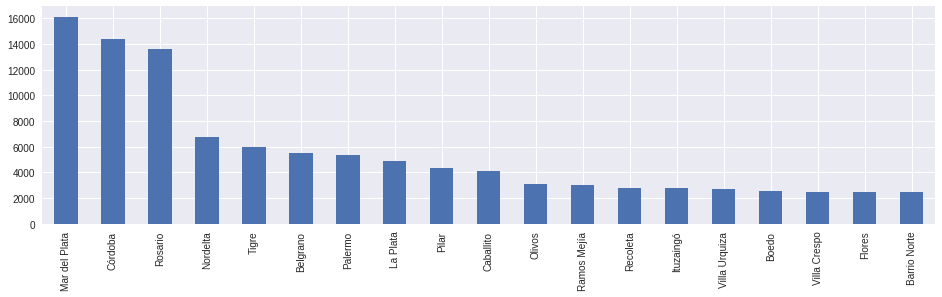

In [186]:
# top 20 lugares con mas ventas

data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4));

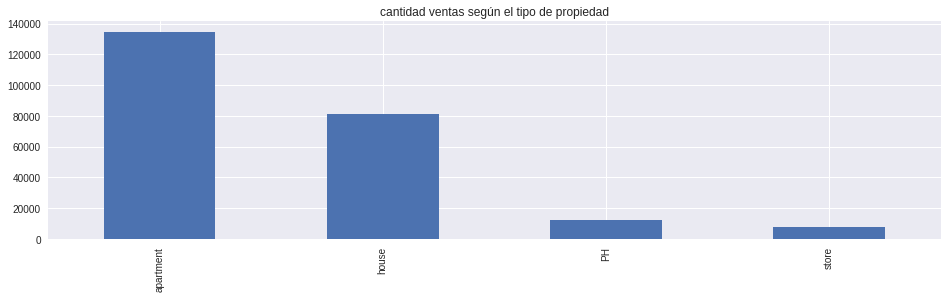

In [187]:
# cantidad de ventas según el tipo de propiedad

data['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="cantidad ventas según el tipo de propiedad");

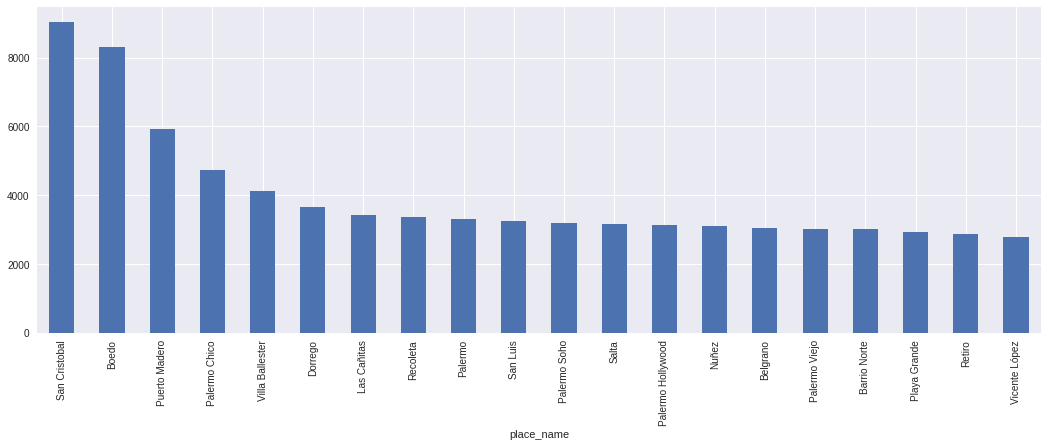

In [188]:
# los 20 lugares mas caros

grouped = data[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])

# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','mean')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

In [3]:
# cantidad de ventas según el mes
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['month'] = data['created_on'].map(lambda x: x.month)

In [44]:
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])
data.month.value_counts()

July         66242
June         33792
May          29506
March        27484
April        25524
February     24857
January      12617
October       4652
September     4240
November      3579
December      3210
August         353
Name: month, dtype: int64

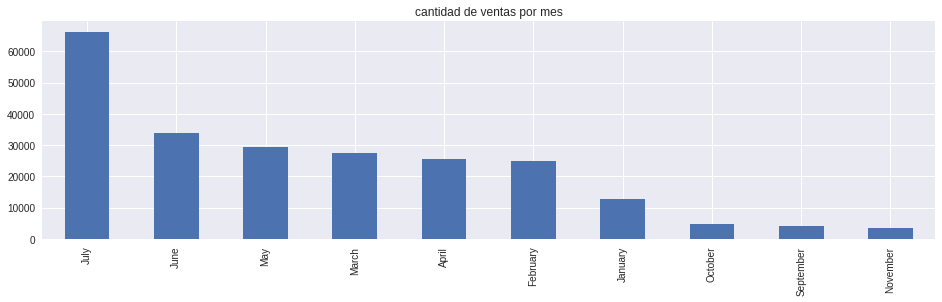

In [5]:
data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4), title="cantidad de ventas por mes");

In [54]:
grouped = data[['place_name', 'month']].groupby(['place_name','month'])['month'].agg(['count'])
grouped_by_month = grouped.reset_index()

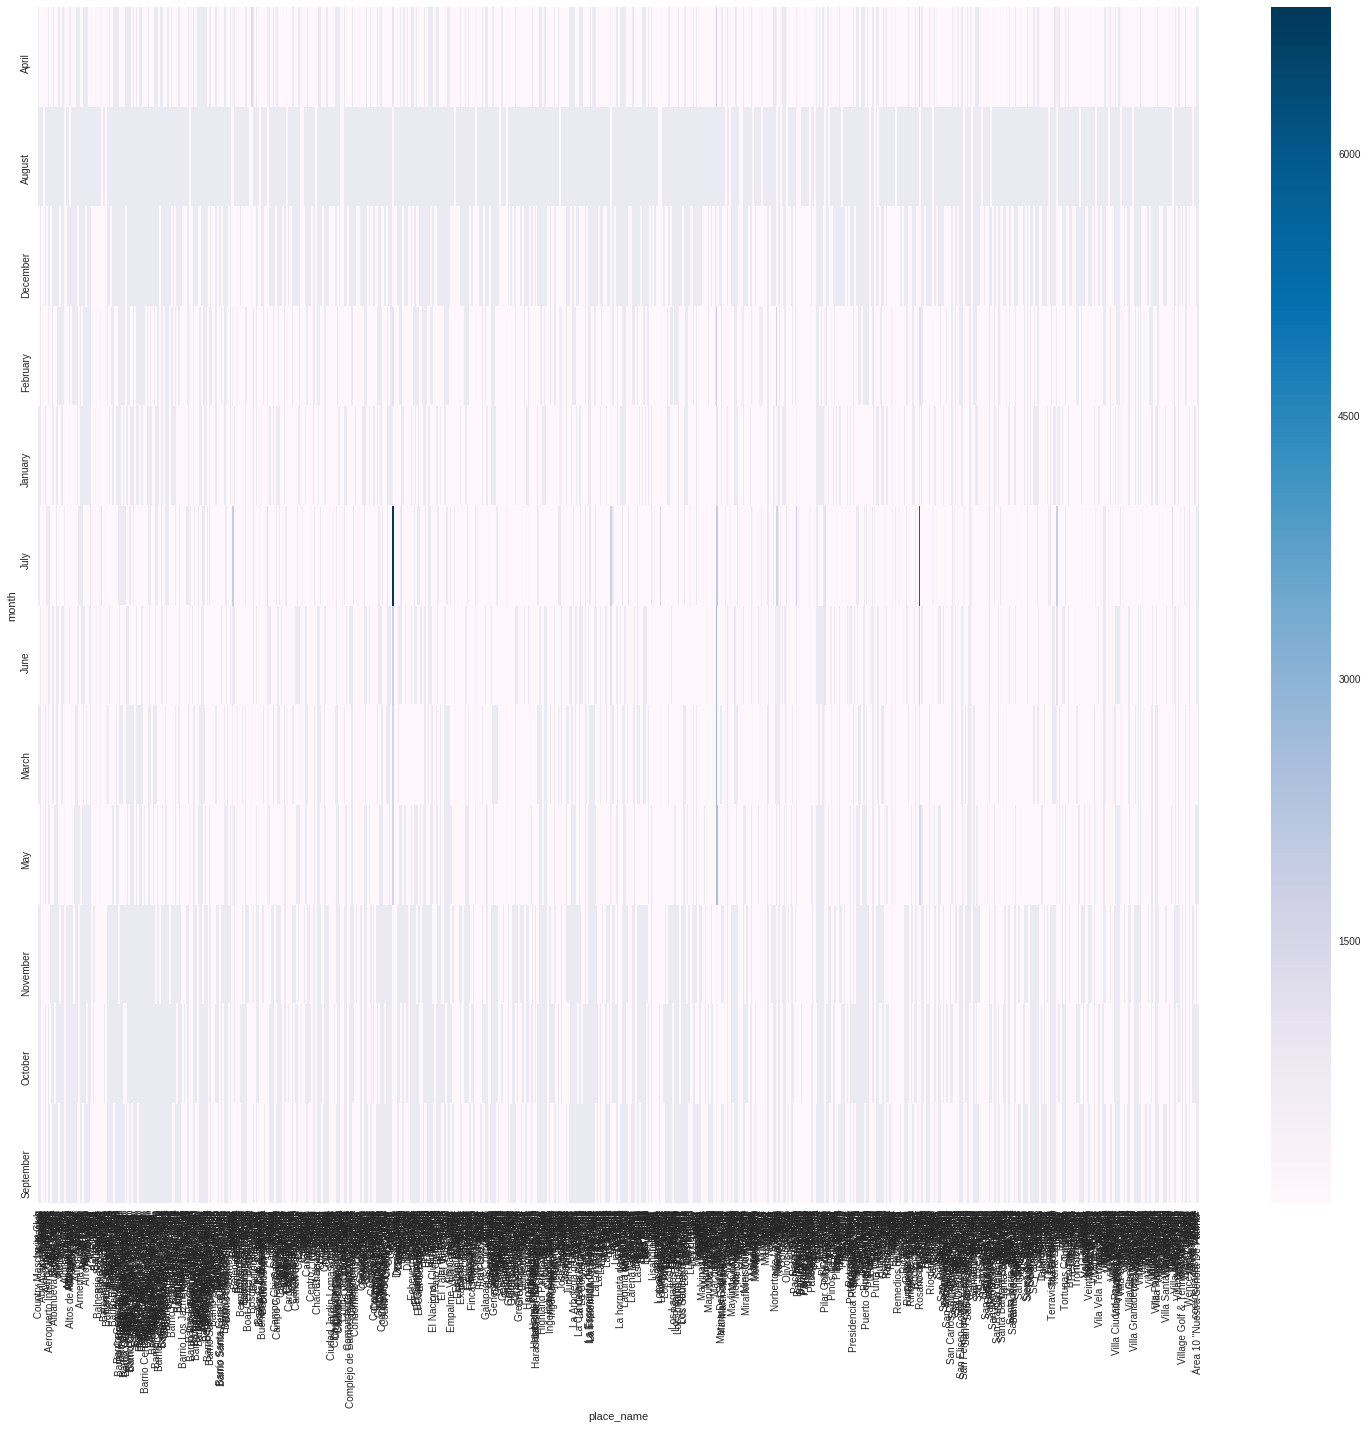

In [34]:
import seaborn as sns

###################################################################################################
#  con filtrar los datos a CABA y Gran Buenos Aires o tomar los 1ros 20 quedaría mejor el gráfico
###################################################################################################

# Heatmap - ventas por mes y lugar
grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='place_name', index='month')
fig, ax = plt.subplots(figsize=(26,22))
sns.heatmap(grouped_by_month,cmap='PuBu');